In [1]:
import tensorflow as tf
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
im_path = '../dataset/svhn/520.jpg'
im = Image.open(im_path)
width, height = im.size

resizedIm = im.resize((64, 64),Image.ANTIALIAS )
resizedIm.save(r'../dataset/svhn/1_1.jpg')
im1 = Image.open('../dataset/svhn/1_1.jpg')
print(im1.size)

(64, 64)


In [14]:
im.show()
array(im).shape

(165, 220, 3)

In [4]:
path_to_image_files = ['../dataset/svhn/1_1.jpg']
images = []

for path_to_image_file in path_to_image_files:
    image = tf.image.decode_jpeg(tf.read_file(path_to_image_file), channels=3)    
    image = tf.reshape(image, (64, 64,3))
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.multiply(tf.subtract(image, 0.5), 2)
    image = tf.image.resize_images(image, [54, 54])
    images.append(image)
images = tf.stack(images)

In [5]:
length_logits, digits_logits = Model.inference(images, drop_rate=0.0)
length_predictions = tf.argmax(length_logits, axis=1)
digits_predictions = tf.argmax(digits_logits, axis=2)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [6]:
sess = tf.InteractiveSession()

In [7]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from logs/train\latest.ckpt


In [8]:
length_predictions_val, digits_predictions_string_val, images_val = sess.run([length_predictions, digits_predictions_string, images])
images_val = (images_val / 2.0) + 0.5

length: 3
digits: b'5201010'


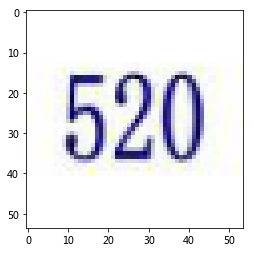

In [9]:
idx = 0
image_val = images_val[idx]
length_prediction_val = length_predictions_val[idx]
digits_prediction_string_val = digits_predictions_string_val[idx]
imshow(images_val[idx])
print ('length: %d' % length_prediction_val)
print ('digits: %s' % digits_prediction_string_val)

In [10]:
sess.close()

In [12]:
images[0]

<tf.Tensor 'strided_slice:0' shape=(54, 54, 3) dtype=float32>